# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings



In [2]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.0
pandas version: 2.2.2
matplotlib version: 3.9.1
seaborn version: 0.13.2


In [7]:
import pyarrow

### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [11]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

In [13]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

In [88]:
# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'C:\Users\heyanand\Documents\Python for data science\python_for_ds\python\06 EDA\graded_assignment_NYC_taxi\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()
print(file_list)

['2023-1.parquet', '2023-10.parquet', '2023-11.parquet', '2023-12.parquet', '2023-2.parquet', '2023-3.parquet', '2023-4.parquet', '2023-5.parquet', '2023-6.parquet', '2023-7.parquet', '2023-8.parquet', '2023-9.parquet', 'df_parquet.parquet']


In [89]:
# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_data = pd.read_parquet(file_path)
        
        # extracting the date and hours from monthly_data
        monthly_data['pickup_date'] = monthly_data['tpep_pickup_datetime'].dt.date
        monthly_data['pickup_hour'] = monthly_data['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in monthly_data['pickup_date'].unique():
            # Filter data for the current date
            date_data = monthly_data[monthly_data['pickup_date'] == date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = date_data[date_data['pickup_hour'] == hour]

                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac=0.05, random_state=42)

                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
    
    df.head()

In [90]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   pickup_date  pickup_hour Airport_fee  
0   2023-01-01            0         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [91]:
# Store the df in csv/parquet
df.to_parquet('df_parquet.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [92]:
# Load the new data file
df = pd.read_parquet('df_parquet.parquet')




In [93]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   pickup_date  pickup_hour Airport_fee  
0   2023-01-01            0         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991327 entries, 0 to 1991326
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

In [95]:
# Reset index to clean up row numbers
df.reset_index(drop=True, inplace=True)

# Drop temporary columns added during sampling

# Display remaining columns
df.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'pickup_date',
       'pickup_hour', 'Airport_fee'],
      dtype='object')

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [96]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)



**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [97]:
# Combine the two airport fee columns

print(df[df['airport_fee'].notna()][['airport_fee', 'Airport_fee']].head())
print(df[df['Airport_fee'].notna()][['airport_fee', 'Airport_fee']].head())


   airport_fee  Airport_fee
0         1.25          NaN
1         0.00          NaN
2         0.00          NaN
3         0.00          NaN
5         0.00          NaN
        airport_fee  Airport_fee
152087          NaN          0.0
152089          NaN          0.0
152090          NaN          0.0
152091          NaN          0.0
152092          NaN          0.0


In [98]:
df.drop(columns='Airport_fee', inplace=True)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...    6.0      0.5        0.00           0.0   
1             1  ...    1.0      0.5        2.58           0.0   
2             2  ...    1.0      0.5        0.00           0.0   
3             2  ...    1.0      0.5        0.00           0.0   
4             0  ...    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   pickup_date pickup_hour  
0   2023-01-01           0  
1   2023-01-01           0  
2   2023-01-01           0  
3   2023-01-01           0  
4   2023-01-01           0  

[5 rows x 21 columns]

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991327 entries, 0 to 1991326
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [100]:
monetary_columns = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee'
]

# Show count of negative values in each column
negative_counts = df[monetary_columns].apply(lambda col: (col < 0).sum())
print(negative_counts[negative_counts > 0])


extra                     3
mta_tax                  82
improvement_surcharge    87
total_amount             87
congestion_surcharge     62
airport_fee               1
dtype: int64


Did you notice something different in the `RatecodeID` column for above records?
df[df['total_amount']<0].head()

In [101]:
# Analyse RatecodeID for the negative fare amounts

# Step 1: Filter rows where any monetary column has a negative value
neg_monetary_rows = df[df[monetary_columns].lt(0).any(axis=1)]

# Step 2: Show frequency of RatecodeID values in those rows
ratecode_counts = neg_monetary_rows['RatecodeID'].value_counts(dropna=False)
print(ratecode_counts)

# Step 3 (optional): View sample rows
neg_monetary_rows[['RatecodeID'] + monetary_columns].head()


RatecodeID
1.0    54
2.0    29
5.0     3
3.0     1
4.0     1
Name: count, dtype: int64


RatecodeID  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
3966          3.0          0.0    0.0      0.0         0.0           0.0   
9093          2.0          0.0    0.0     -0.5         0.0           0.0   
77200         2.0          0.0    0.0     -0.5         0.0           0.0   
77920         1.0          0.0    0.0     -0.5         0.0           0.0   
86509         1.0          0.0    0.0     -0.5         0.0           0.0   

       improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
3966                    -1.0         -1.00                   0.0         0.00  
9093                    -1.0         -5.25                  -2.5        -1.25  
77200                   -1.0         -4.00                  -2.5         0.00  
77920                   -1.0         -4.00                  -2.5         0.00  
86509                   -1.0         -4.00                  -2.5         0.00

In [ ]:
# Find which columns have negative values - completed in cell 35



In [102]:
# fix these negative values
# Replace negative values with 0 in all monetary columns
for col in monetary_columns:
    df.loc[df[col] < 0, col] = 0

# Confirm no negative values remain in monetary columns
print(df[monetary_columns].lt(0).any())



fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge     False
airport_fee              False
dtype: bool


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [103]:
# Find the proportion of missing values in each column
# Create an empty dictionary to store proportions
missing_proportions = {}

# Loop through each column in the DataFrame
for column in df.columns:
    
    # Count how many values are missing (NaN) in this column
    missing_count = df[column].isna().sum()
    
    # Total number of rows in the DataFrame
    total_rows = len(df)
    
    # Calculate the proportion of missing values
    proportion = missing_count / total_rows

    # Add the result to the dictionary
    missing_proportions[column] = proportion

# Convert the dictionary to a sorted list of tuples
sorted_missing = sorted(missing_proportions.items(), key=lambda x: x[1], reverse=True)

# Print the columns that have missing values
for column, prop in sorted_missing:
    if prop > 0:
        print(f"{column}: {prop:.2%} missing")




airport_fee: 92.17% missing
passenger_count: 3.42% missing
RatecodeID: 3.42% missing
store_and_fwd_flag: 3.42% missing
congestion_surcharge: 3.42% missing


In [105]:
#drop the negative_counts column
df.drop('negative_counts', axis=1, inplace=True)

KeyError: "['negative_counts'] not found in axis"

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [106]:
# Display the rows with null values passenger_count in df dataframe
df[df['passenger_count'].isna()].head()




VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4          2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15         2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
42         2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
43         2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
46         2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
4           19.24         NaN               None            66           107   
15          10.77         NaN               None           151           106   
42           4.52         NaN               None           114           262   
43           9.19         NaN               None           239           256   
46           2.74         NaN               None            90            48   

    payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
4              0  ...    0.0      0.5        5.93          0.00   
15             0  ...    0.0      0.5       11.19          6.55   
42             0  ...    0.0      0.5        0.00          0.00   
43             0  ...    0.0      0.5        2.20          0.00   
46             0  ...    0.0      0.5        3.37          0.00   

    improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
4                     1.0         35.57                   NaN          NaN   
15                    1.0         67.12                   NaN          NaN   
42                    1.0         29.38                   NaN          NaN   
43                    1.0         46.20                   NaN          NaN   
46                    1.0         25.85                   NaN          NaN   

    pickup_date pickup_hour  
4    2023-01-01           0  
15   2023-01-01           0  
42   2023-01-01           0  
43   2023-01-01           0  
46   2023-01-01           0  

[5 rows x 21 columns]

In [107]:

# Impute NaN values in 'passenger_count'
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)

C:\Users\heyanand\AppData\Local\Temp\ipykernel_24200\1573032625.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)


Did you find zeroes in passenger_count? Handle these.

In [108]:
# Step 1: Check how many rows have passenger_count = 0
zero_passenger_rows = df[df['passenger_count'] == 0]
print("Rows with passenger_count = 0:", len(zero_passenger_rows))

# Step 2: Calculate the median of non-zero and non-null passenger counts
median_passenger = df['passenger_count'][df['passenger_count'] > 0].median()
print("Median passenger count (excluding 0s):", median_passenger)

Rows with passenger_count = 0: 31234
Median passenger count (excluding 0s): 1.0


In [109]:
# Step 3: Replace 0s with median
df.loc[df['passenger_count'] == 0, 'passenger_count'] = median_passenger

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [110]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].value_counts()


RatecodeID
1.0     1815901
2.0       75176
99.0      11000
5.0       10798
3.0        6419
4.0        3898
6.0           3
Name: count, dtype: int64

In [111]:
# Step 2: Fill NaN values with 1.0 (standard rate)
df['RatecodeID'].fillna(1.0, inplace=True)

C:\Users\heyanand\AppData\Local\Temp\ipykernel_24200\3484313949.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatecodeID'].fillna(1.0, inplace=True)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [112]:
# handle null values in congestion_surcharge

df['congestion_surcharge'].fillna(0, inplace=True)




C:\Users\heyanand\AppData\Local\Temp\ipykernel_24200\3623568747.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['congestion_surcharge'].fillna(0, inplace=True)


In [113]:
df['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    1775319
0.0     216007
0.5          1
Name: count, dtype: int64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [114]:
# Handle any remaining missing values
# Step 1: Create an empty dictionary to store missing counts
missing_counts = {}

# Step 2: Loop through each column
for column in df.columns:
    # Count how many NaN values there are
    count = df[column].isna().sum()
    
    # Add to the dictionary
    missing_counts[column] = count

# Step 3: Display only the columns that have missing values
for column, count in missing_counts.items():
    if count > 0:
        print(f"{column}: {count} missing values")



store_and_fwd_flag: 68132 missing values
airport_fee: 1835423 missing values


In [115]:
df['airport_fee'].fillna(0, inplace=True)

C:\Users\heyanand\AppData\Local\Temp\ipykernel_24200\2456695840.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['airport_fee'].fillna(0, inplace=True)


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [116]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()



VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.991327e+06                     1991327                     1991327   
mean   1.733027e+00  2023-07-02 19:56:59.353727  2023-07-02 20:14:24.971398   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-02 16:07:35         2023-04-02 16:26:48   
50%    2.000000e+00         2023-06-27 15:42:38         2023-06-27 15:59:44   
75%    2.000000e+00  2023-10-06 19:35:42.500000  2023-10-06 19:51:36.500000   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476258e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.991327e+06   1.991327e+06  1.991327e+06  1.991327e+06   
mean      1.371882e+00   3.863202e+00  1.613116e+00  1.652791e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.800000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  9.900000e+01  2.650000e+02   
std       8.641286e-01   1.287900e+02  7.268510e+00  6.399624e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.991327e+06  1.991327e+06  1.991327e+06  1.991327e+06  1.991327e+06   
mean   1.640436e+02  1.163831e+00  1.991198e+01  1.588181e+00  4.952926e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.980068e+01  5.082357e-01  1.030654e+02  1.829576e+00  4.857914e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.991327e+06  1.991327e+06           1.991327e+06  1.991327e+06   
mean   3.546480e+00  5.965518e-01           9.990097e-01  2.897433e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.055696e+00  2.187337e+00           2.911589e-02  1.039651e+02   

       congestion_surcharge   airport_fee   pickup_hour  
count          1.991327e+06  1.991327e+06  1.991327e+06  
mean           2.228814e+00  8.521328e-03  1.426448e+01  
min            0.000000e+00  0.000000e+00  0.000000e+00  
25%            2.500000e+00  0.000000e+00  1.100000e+01  
50%            2.500000e+00  0.000000e+00  1.500000e+01  
75%            2.500000e+00  0.000000e+00  1.900000e+01  
max            2.500000e+00  1.250000e+00  2.300000e+01  
std            7.774461e-01  1.028545e-01  5.807771e+00

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [117]:
# remove passenger_count > 6
# Remove entries with passenger_count > 6 (standard taxi limit)
df = df[df['passenger_count'] <= 6]

print("Remaining rows after removing invalid passenger counts:", len(df))


Remaining rows after removing invalid passenger counts: 1991306


In [118]:
# Continue with outlier handling
# Remove trips with unrealistically high distances (> 250 miles)
df = df[df['trip_distance'] <= 250]

print("Remaining rows after removing extreme distances:", len(df))



Remaining rows after removing extreme distances: 1991258


In [119]:
# Remove rows where distance is 0 but fare is unusually high (> $300)
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] > 300))]

print("Rows after removing zero-distance + high-fare trips:", len(df))


Rows after removing zero-distance + high-fare trips: 1991223


In [120]:
# Keep only rows where payment_type is between 1 and 6
df = df[df['payment_type'].isin([1, 2, 3, 4, 5, 6])]

print("Remaining rows after fixing payment_type:", len(df))


Remaining rows after fixing payment_type: 1923120


In [121]:
# Do any columns need standardising?

print("✅ Outlier cleaning complete!")
print("Final shape of the cleaned dataset:", df.shape)


✅ Outlier cleaning complete!
Final shape of the cleaned dataset: (1923120, 21)


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [122]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_date',
 'pickup_hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

In [123]:
# Step 1: List of variables with type classification

numerical_vars = [
    'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 
    'tolls_amount', 'improvement_surcharge', 'total_amount',
    'congestion_surcharge', 'airport_fee', 'passenger_count'
]

categorical_vars = [
    'VendorID', 'RatecodeID', 'payment_type', 'PULocationID', 'DOLocationID'
]

temporal_vars = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pickup_hour']

# Show them
print("Numerical variables:")
print(numerical_vars)
print("\nCategorical variables:")
print(categorical_vars)
print("\nTemporal variables:")
print(temporal_vars)


Numerical variables:
['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'passenger_count']

Categorical variables:
['VendorID', 'RatecodeID', 'payment_type', 'PULocationID', 'DOLocationID']

Temporal variables:
['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pickup_hour']


**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [124]:
# Find and show the hourly trends in taxi pickups

# Create new columns for analysis
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.day_name()
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()


In [125]:
# Find and show the daily trends in taxi pickups (days of the week)

# Set plot style
sns.set(style='whitegrid')

# Count number of pickups per hour
hourly_counts = df['pickup_hour'].value_counts().sort_index()

# Plot the hourly pickup distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette="Blues_d")
plt.title("Number of Pickups by Hour of Day")
plt.xlabel("Hour of Day (0 = Midnight)")
plt.ylabel("Number of Pickups")
plt.xticks(range(0, 24))
plt.show()

C:\Users\heyanand\AppData\Local\Temp\ipykernel_24200\208183605.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette="Blues_d")


C:\Users\heyanand\AppData\Local\Temp\ipykernel_24200\4020344016.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='YlOrBr')


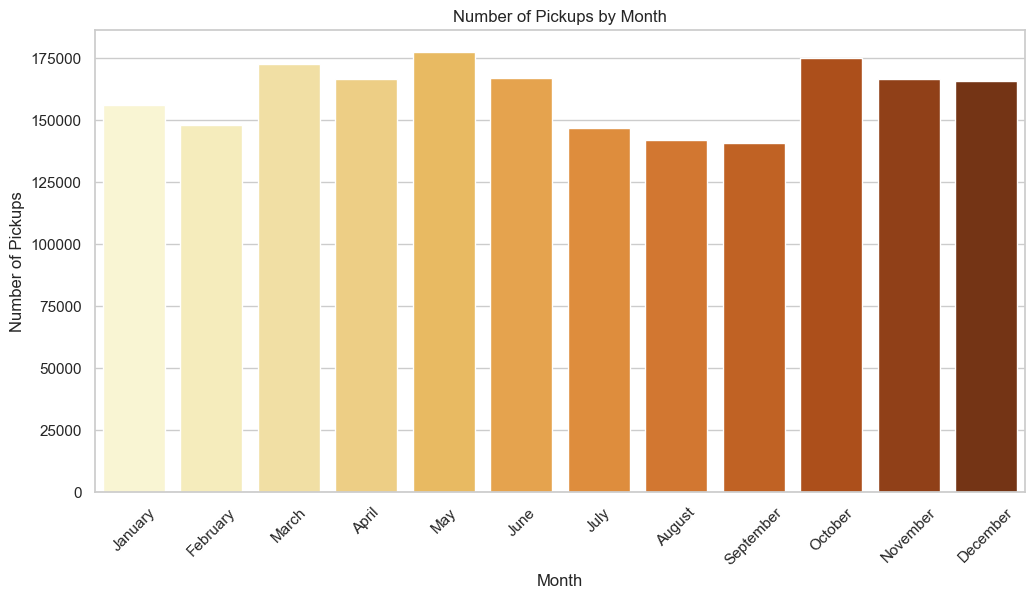

In [126]:
# Show the monthly trends in pickups

# Count pickups by month name
monthly_counts = df['pickup_month'].value_counts()

# Order months correctly (not alphabetically)
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Reindex to sort by actual calendar order
monthly_counts = monthly_counts.reindex(month_order)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='YlOrBr')
plt.title("Number of Pickups by Month")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.show()


C:\Users\heyanand\AppData\Local\Temp\ipykernel_24200\898997107.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette='coolwarm')


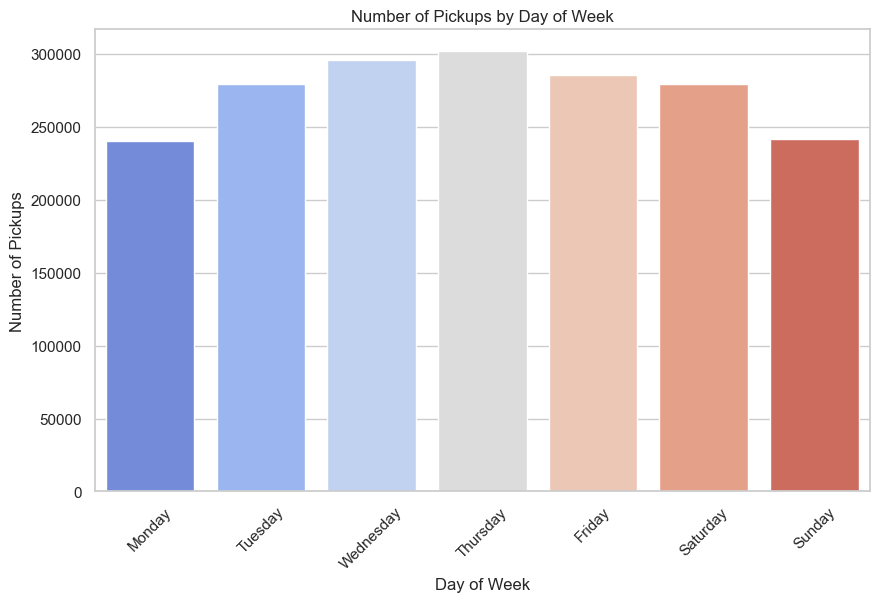

In [127]:
# Count pickups by day of the week
day_counts = df['pickup_dayofweek'].value_counts()

# Reorder days from Monday to Sunday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.reindex(day_order)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='coolwarm')
plt.title("Number of Pickups by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [73]:
df[['fare_amount', 'tip_amount', 'total_amount']].value_counts()

fare_amount  tip_amount  total_amount
10.0         2.80        16.80           18469
6.5          2.10        12.60           14573
9.3          2.66        15.96           14183
8.6          2.52        15.12           14140
13.5         3.50        21.00           13975
                                         ...  
420.0        10.00       439.30              1
433.5        0.00        441.05              1
437.0        0.00        446.60              1
437.7        0.00        443.45              1
441.2        50.00       492.70              1
Name: count, Length: 76612, dtype: int64

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [128]:
# Create a df with non zero entries for the selected parameters.


# Define key financial columns
key_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Create a new DataFrame excluding rows where any of these columns are 0
df_nonzero = df[
    (df['fare_amount'] > 0) &
    (df['tip_amount'] > 0) &
    (df['total_amount'] > 0) &
    (df['trip_distance'] > 0)
]

print("Original rows:", len(df))
print("Rows after removing 0s from key financial columns:", len(df_nonzero))


Original rows: 1923120
Rows after removing 0s from key financial columns: 1483559


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

C:\Users\heyanand\AppData\Local\Temp\ipykernel_24200\1484599539.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette='viridis')


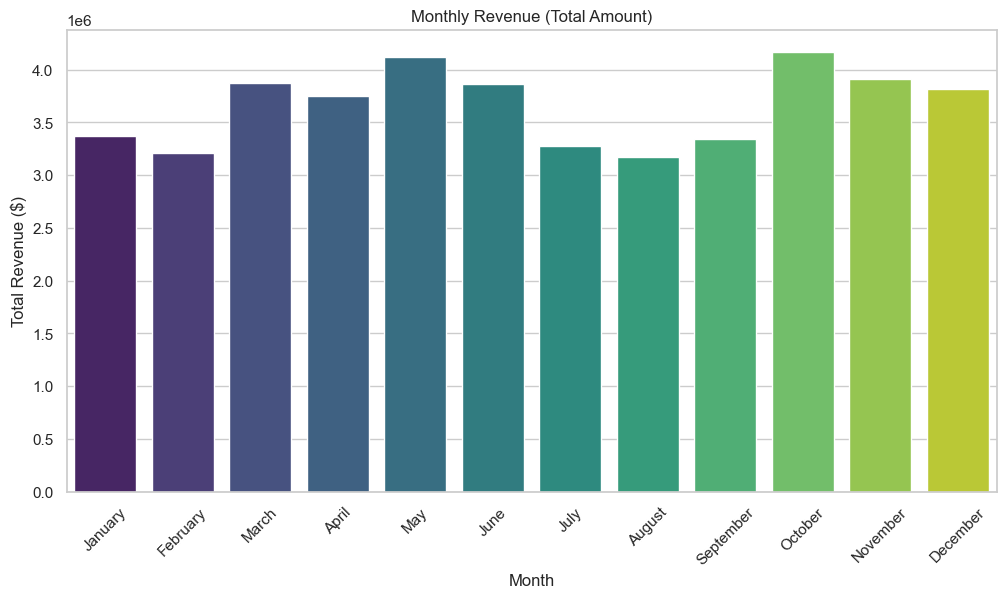

In [129]:

# Group data by month and sum the total revenue (total_amount)
monthly_revenue = df_nonzero.groupby('pickup_month')['total_amount'].sum()

# Ensure months are in calendar order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_revenue = monthly_revenue.reindex(month_order)

# Plot the monthly revenue trend
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette='viridis')
plt.title("Monthly Revenue (Total Amount)")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

C:\Users\heyanand\AppData\Local\Temp\ipykernel_24200\170758676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonzero['quarter'] = df_nonzero['tpep_pickup_datetime'].dt.quarter


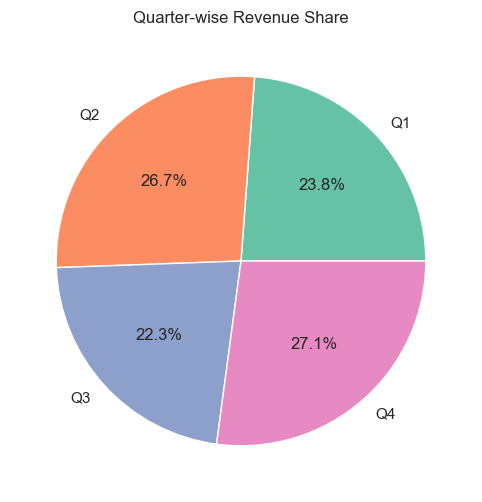

In [130]:
# Calculate proportion of each quarter
# Step 1: Create a new column for the quarter
df_nonzero['quarter'] = df_nonzero['tpep_pickup_datetime'].dt.quarter

# Step 2: Group by quarter and sum revenue
quarterly_revenue = df_nonzero.groupby('quarter')['total_amount'].sum()

# Step 3: Calculate proportion of each quarter
quarterly_proportion = quarterly_revenue / quarterly_revenue.sum()

# Step 4: Plot
plt.figure(figsize=(8, 6))
quarterly_proportion.plot(kind='pie', autopct='%1.1f%%', labels=['Q1', 'Q2', 'Q3', 'Q4'], colors=sns.color_palette('Set2'))
plt.title("Quarter-wise Revenue Share")
plt.ylabel("")  # remove y-label for a cleaner pie chart
plt.show()




In [146]:
df_nonzero.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'pickup_date',
       'pickup_hour', 'pickup_dayofweek', 'pickup_month', 'quarter',
       'trip_duration', 'payment_type_label'],
      dtype='object')

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [131]:
# Show how trip fare is affected by distance
# Step 1: Filter rows with trip_distance > 0 to avoid skew
filtered_df = df_nonzero[df_nonzero['trip_distance'] > 0]

# Step 2: Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='trip_distance', y='fare_amount', alpha=0.3)
plt.title("Fare Amount vs Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.show()

# Step 3: Correlation coefficient
correlation = filtered_df['trip_distance'].corr(filtered_df['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {correlation:.2f}")




Correlation between trip_distance and fare_amount: 0.95


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [132]:
# Show relationship between fare and trip duration

# Create a new column for trip duration in minutes
df_nonzero['trip_duration'] = (df_nonzero['tpep_dropoff_datetime'] - df_nonzero['tpep_pickup_datetime']).dt.total_seconds() / 60


C:\Users\heyanand\AppData\Local\Temp\ipykernel_24200\2224434674.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonzero['trip_duration'] = (df_nonzero['tpep_dropoff_datetime'] - df_nonzero['tpep_pickup_datetime']).dt.total_seconds() / 60


In [137]:

df_nonzero.loc[df_nonzero['trip_duration'] < 0, 'trip_duration'] = 0


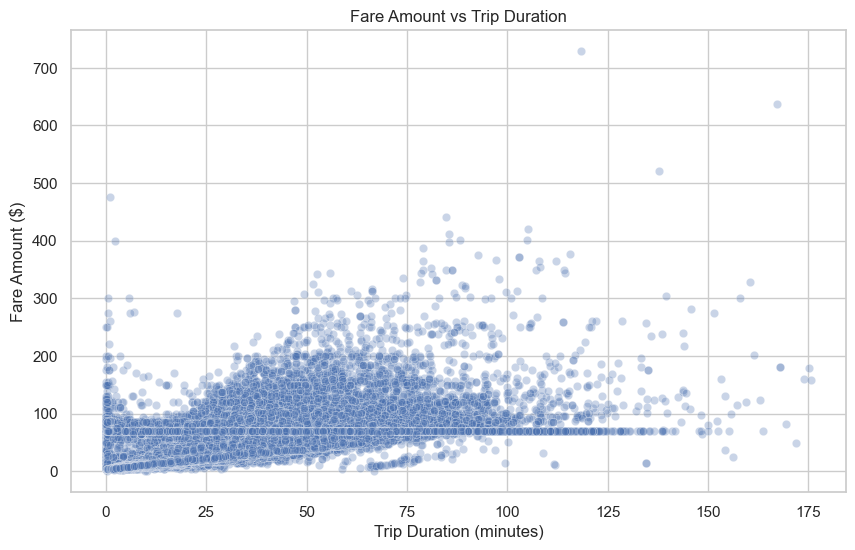

Correlation between trip duration and fare amount: 0.86


In [138]:
# Step 1: Filter out extreme durations (e.g., over 180 mins) for cleaner plot
filtered_duration_df = df_nonzero[df_nonzero['trip_duration'] <= 180]

# Step 2: Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_duration_df, x='trip_duration', y='fare_amount', alpha=0.3)
plt.title("Fare Amount vs Trip Duration")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.show()

# Step 3: Correlation
correlation = filtered_duration_df['trip_duration'].corr(filtered_duration_df['fare_amount'])
print(f"Correlation between trip duration and fare amount: {correlation:.2f}")


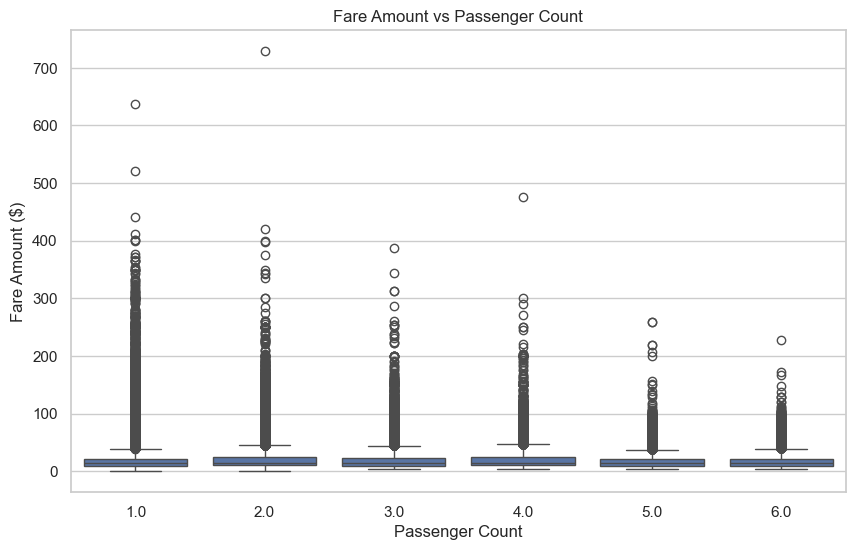

Correlation between fare amount and passenger count: 0.04


In [139]:
# Show relationship between fare and number of passengers
# Boxplot to show distribution of fare by passenger count
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_nonzero, x='passenger_count', y='fare_amount')
plt.title("Fare Amount vs Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.show()

# Optional: correlation (not meaningful for categorical-like data, but shown for completeness)
correlation = df_nonzero['fare_amount'].corr(df_nonzero['passenger_count'])
print(f"Correlation between fare amount and passenger count: {correlation:.2f}")



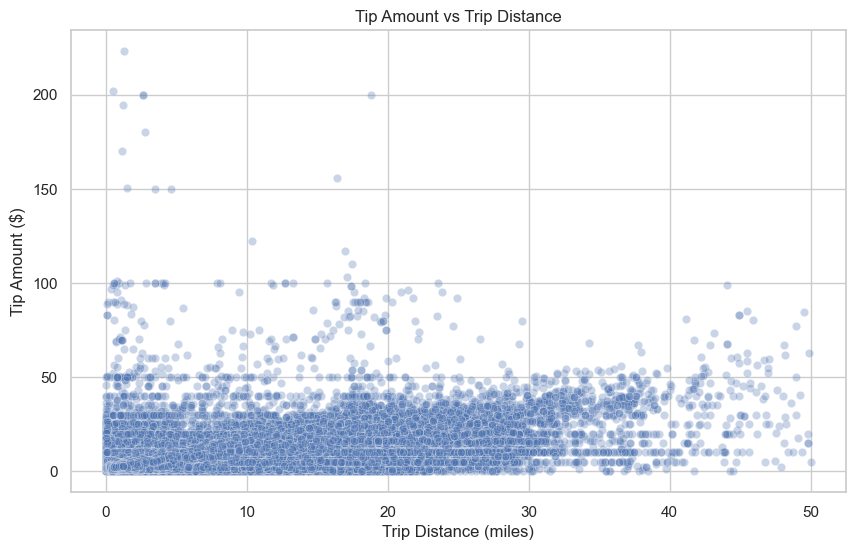

Correlation between trip distance and tip amount: 0.80


In [140]:
# Show relationship between tip and trip distance

# Step 1: Filter out very long trips for clearer visualization (e.g., > 50 miles)
filtered_tips_df = df_nonzero[df_nonzero['trip_distance'] <= 50]

# Step 2: Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_tips_df, x='trip_distance', y='tip_amount', alpha=0.3)
plt.title("Tip Amount vs Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.show()

# Step 3: Correlation
correlation = filtered_tips_df['trip_distance'].corr(filtered_tips_df['tip_amount'])
print(f"Correlation between trip distance and tip amount: {correlation:.2f}")


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

C:\Users\heyanand\AppData\Local\Temp\ipykernel_24200\1214155296.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonzero['payment_type_label'] = df_nonzero['payment_type'].map(payment_labels)
C:\Users\heyanand\AppData\Local\Temp\ipykernel_24200\1214155296.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='pastel')


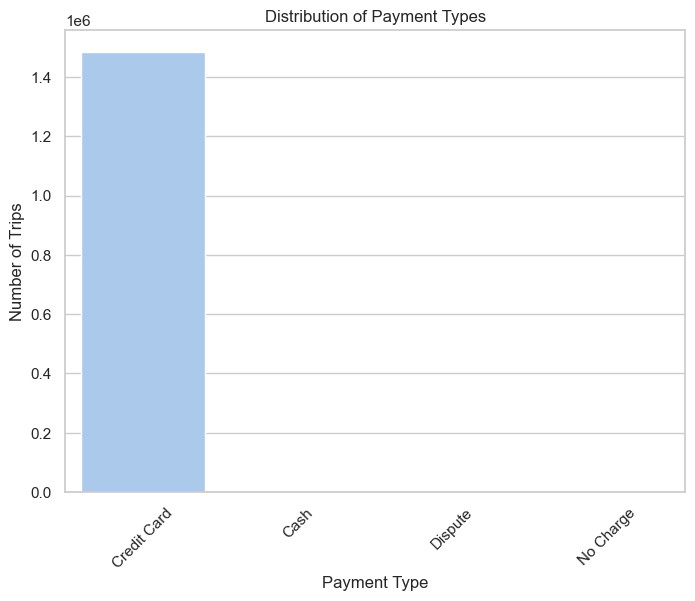

In [141]:
# Analyse the distribution of different payment types (payment_type).

# Step 1: Map payment type codes to labels
payment_labels = {
    1: 'Credit Card', 2: 'Cash', 3: 'No Charge',
    4: 'Dispute', 5: 'Unknown', 6: 'Voided'
}
df_nonzero['payment_type_label'] = df_nonzero['payment_type'].map(payment_labels)

# Step 2: Count and plot
payment_counts = df_nonzero['payment_type_label'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='pastel')
plt.title("Distribution of Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [82]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [142]:
# Import geopandas
import geopandas as gpd

# Path to your taxi_zones folder (adjust if needed)
shapefile_path = (r'C:\Users\heyanand\Documents\Python for data science\python_for_ds\python\06 EDA\graded_assignment_NYC_taxi\taxi_zones\taxi_zones.shp')

# Read the shapefile
zones = gpd.read_file(shapefile_path)

# Show the first few rows
zones.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [143]:
# Check the columns in the zones GeoDataFrame
print(zones.columns)


Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')


Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [148]:
print(df_nonzero.columns)
print(zones.columns)


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'pickup_date',
       'pickup_hour', 'pickup_dayofweek', 'pickup_month', 'quarter',
       'trip_duration', 'payment_type_label'],
      dtype='object')
Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')


In [149]:
# Merge using different column names on each side
df_pickups_geo = df_nonzero.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')

# Show some merged rows
df_pickups_geo[['PULocationID', 'zone', 'borough']].head()


PULocationID                       zone    borough
0           161             Midtown Center  Manhattan
1           246  West Chelsea/Hudson Yards  Manhattan
2            79               East Village  Manhattan
3            79               East Village  Manhattan
4           132                JFK Airport     Queens

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [150]:
# Group data by location and calculate the number of trips

pickup_counts = df_pickups_geo.groupby('PULocationID').size().reset_index(name='trip_count')

# Show top 5 busiest pickup zones
pickup_counts.sort_values(by='trip_count', ascending=False).head()




PULocationID  trip_count
199           237       73339
134           161       71082
198           236       66887
109           132       66732
135           162       55364

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [151]:
# Merge trip counts back to the zones GeoDataFrame
# Rename 'LocationID' to match pickup_counts for merging
zones = zones.rename(columns={'LocationID': 'PULocationID'})

# Merge zones with pickup_counts to get trip count per zone
zones_with_trips = zones.merge(pickup_counts, on='PULocationID', how='left')

# Fill zones with no trips as 0
zones_with_trips['trip_count'] = zones_with_trips['trip_count'].fillna(0)

# Preview result
zones_with_trips[['zone', 'borough', 'trip_count']].sort_values(by='trip_count', ascending=False).head()




zone    borough  trip_count
236  Upper East Side South  Manhattan     73339.0
160         Midtown Center  Manhattan     71082.0
235  Upper East Side North  Manhattan     66887.0
131            JFK Airport     Queens     66732.0
161           Midtown East  Manhattan     55364.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

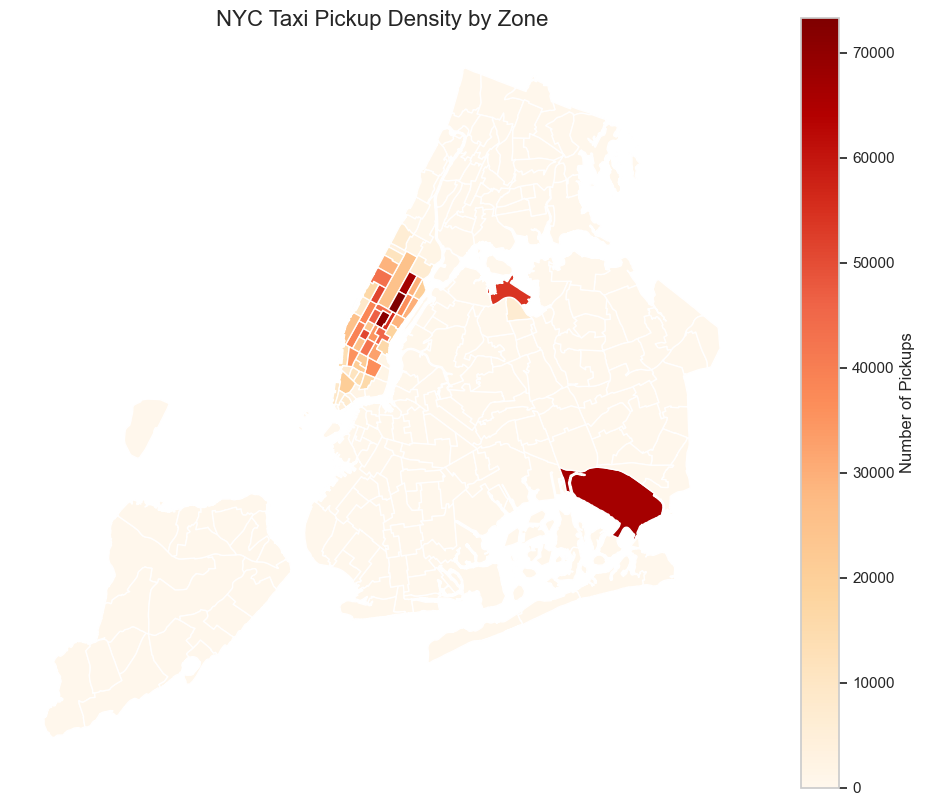

In [152]:
# Plotting the zones by trip count
import matplotlib.pyplot as plt

# Set up figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map with color based on trip count
zones_with_trips.plot(
    column='trip_count',
    ax=ax,
    legend=True,
    cmap='OrRd',
    legend_kwds={'label': "Number of Pickups", 'orientation': "vertical"}
)

# Title and aesthetics
ax.set_title("NYC Taxi Pickup Density by Zone", fontsize=16)
ax.axis('off')  # Hide axes
plt.show()


In [153]:
# Sort zones by number of trips in descending order
top_zones = zones_with_trips.sort_values(by='trip_count', ascending=False)

# Show top 10 zones with the most pickups
top_zones[['PULocationID', 'zone', 'borough', 'trip_count']].head(10)



PULocationID                          zone    borough  trip_count
236           237         Upper East Side South  Manhattan     73339.0
160           161                Midtown Center  Manhattan     71082.0
235           236         Upper East Side North  Manhattan     66887.0
131           132                   JFK Airport     Queens     66732.0
161           162                  Midtown East  Manhattan     55364.0
137           138             LaGuardia Airport     Queens     54212.0
141           142           Lincoln Square East  Manhattan     51406.0
185           186  Penn Station/Madison Sq West  Manhattan     51031.0
229           230     Times Sq/Theatre District  Manhattan     46551.0
169           170                   Murray Hill  Manhattan     45444.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [155]:
# First, calculate trip duration in minutes (if not already)
df_nonzero['trip_duration'] = (df_nonzero['tpep_dropoff_datetime'] - df_nonzero['tpep_pickup_datetime']).dt.total_seconds() / 60

# Group by pickup and dropoff location along with pickup hour
route_speed = df_nonzero.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg({
    'trip_distance': 'mean',
    'trip_duration': 'mean'
}).reset_index()

# Calculate average speed (miles per minute)
route_speed['speed_mpm'] = route_speed['trip_distance'] / route_speed['trip_duration']
# Sort routes by lowest average speed
slow_routes = route_speed.sort_values(by='speed_mpm').head(10)
slow_routes


C:\Users\heyanand\AppData\Local\Temp\ipykernel_24200\643072087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonzero['trip_duration'] = (df_nonzero['tpep_dropoff_datetime'] - df_nonzero['tpep_pickup_datetime']).dt.total_seconds() / 60


PULocationID  DOLocationID  pickup_hour  trip_distance  trip_duration  \
63977           164            33            1       5.683333      -0.422222   
23066            90            88            1       3.240000      -3.205556   
31232           114           120            1       9.880000     -12.050000   
91212           238           263            1       1.912000      -2.356667   
85634           234           211            1       1.877500      -4.620833   
90936           238           233            1       4.485000     -11.058333   
13725            68           226            1       4.280000     -11.408333   
31132           114           106            1       3.560000     -43.600000   
71917           198            36            1       1.700000     -52.600000   
92930           243           264           17       0.180000    1389.550000   

       speed_mpm  
63977 -13.460526  
23066  -1.010745  
31232  -0.819917  
91212  -0.811315  
85634  -0.406312  
90936  -0.405576  
13725  -0.375164  
31132  -0.081651  
71917  -0.032319  
92930   0.000130

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

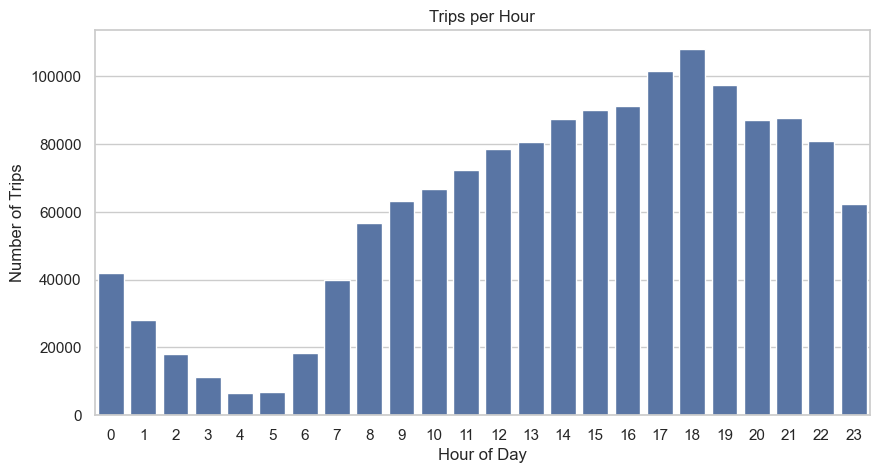

pickup_hour  trip_count
18           18      108214

In [156]:
# Count number of trips per hour
hourly_trips = df_nonzero.groupby('pickup_hour').size().reset_index(name='trip_count')

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='pickup_hour', y='trip_count', data=hourly_trips)
plt.title('Trips per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()

# Busiest hour
busiest_hour = hourly_trips.sort_values(by='trip_count', ascending=False).head(1)
busiest_hour


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [157]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers

sample_fraction = 0.05
hourly_trips['scaled_trip_count'] = hourly_trips['trip_count'] / sample_fraction

# Top 5 busiest hours scaled
hourly_trips.sort_values(by='scaled_trip_count', ascending=False).head(5)



pickup_hour  trip_count  scaled_trip_count
18           18      108214          2164280.0
17           17      101729          2034580.0
19           19       97386          1947720.0
16           16       91182          1823640.0
15           15       89972          1799440.0

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

C:\Users\heyanand\AppData\Local\Temp\ipykernel_24200\2305555807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonzero['day_type'] = df_nonzero['pickup_dayofweek'].apply(


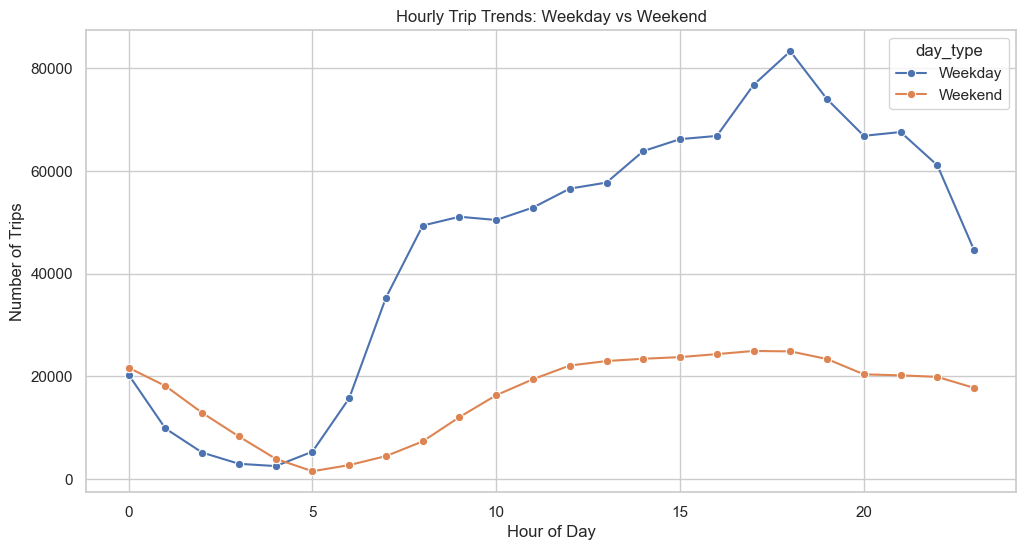

In [161]:
# Redefine 'day_type' using correct day names
df_nonzero['day_type'] = df_nonzero['pickup_dayofweek'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday'
)

# Group and count trips by hour and day_type
hourly_trend = df_nonzero.groupby(['pickup_hour', 'day_type']).size().reset_index(name='trip_count')

# Plot the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_trend, x='pickup_hour', y='trip_count', hue='day_type', marker='o')
plt.title('Hourly Trip Trends: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

Answer: no specific rush on weekends around 5pm

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [162]:
# Find top 10 pickup and dropoff zones
pickup_counts = df_nonzero['PULocationID'].value_counts().head(10)
dropoff_counts = df_nonzero['DOLocationID'].value_counts().head(10)

print("Top 10 Pickup Zones:\n", pickup_counts)
print("Top 10 Dropoff Zones:\n", dropoff_counts)



Top 10 Pickup Zones:
 PULocationID
237    73339
161    71082
236    66887
132    66732
162    55364
138    54212
142    51406
186    51031
230    46551
170    45444
Name: count, dtype: int64
Top 10 Dropoff Zones:
 DOLocationID
236    70893
237    65619
161    58172
170    45323
239    44845
142    43604
162    43382
141    41806
230    41271
68     37908
Name: count, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [163]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_drop_counts = df_nonzero.groupby('PULocationID').size().reset_index(name='pickups')
drop_counts = df_nonzero.groupby('DOLocationID').size().reset_index(name='dropoffs')

# Merge both
zone_ratio = pd.merge(pickup_drop_counts, drop_counts, left_on='PULocationID', right_on='DOLocationID')
zone_ratio['pickup_drop_ratio'] = zone_ratio['pickups'] / zone_ratio['dropoffs']

# Top and bottom 10
top_ratios = zone_ratio.sort_values(by='pickup_drop_ratio', ascending=False).head(10)
bottom_ratios = zone_ratio.sort_values(by='pickup_drop_ratio', ascending=True).head(10)
top_ratios, bottom_ratios


(     PULocationID  pickups  DOLocationID  dropoffs  pickup_drop_ratio
 60             70     6741            70       480          14.043750
 108           132    66732           132     14060           4.746230
 114           138    54212           138     18905           2.867601
 170           207       13           207         7           1.857143
 154           186    51031           186     30930           1.649887
 35             43    25119            43     18071           1.390017
 93            114    20874           114     15051           1.386885
 208           249    35697           249     26760           1.333969
 134           162    55364           162     43382           1.276198
 84            100    22432           100     18335           1.223452,
      PULocationID  pickups  DOLocationID  dropoffs  pickup_drop_ratio
 187           227        1           227       158           0.006329
 169           205        1           205       151           0.006623
 137 

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [164]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_df = df_nonzero[df_nonzero['pickup_hour'].isin([23, 0, 1, 2, 3, 4, 5])]
night_pickups = night_df['PULocationID'].value_counts().head(10)
night_dropoffs = night_df['DOLocationID'].value_counts().head(10)
night_pickups, night_dropoffs


(PULocationID
 79     13490
 249    11063
 132     9997
 48      8504
 148     8420
 114     7666
 230     6174
 186     5606
 164     5032
 138     4936
 Name: count, dtype: int64,
 DOLocationID
 79     7117
 48     5355
 170    5291
 107    5117
 141    4735
 68     4720
 263    4441
 249    4333
 239    3950
 236    3882
 Name: count, dtype: int64)

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [165]:
# Filter for night hours (11 PM to 5 AM)
night_revenue = night_df['total_amount'].sum()
day_revenue = df_nonzero[~df_nonzero['pickup_hour'].isin([23, 0, 1, 2, 3, 4, 5])]['total_amount'].sum()

night_share = night_revenue / (night_revenue + day_revenue)
day_share = 1 - night_share

print(f"Night Revenue Share: {night_share:.2%}")
print(f"Day Revenue Share: {day_share:.2%}")



Night Revenue Share: 11.94%
Day Revenue Share: 88.06%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [166]:
# Analyse the fare per mile per passenger for different passenger counts

df_nonzero['fare_per_mile_per_passenger'] = df_nonzero['fare_amount'] / (df_nonzero['trip_distance'] * df_nonzero['passenger_count'])
fare_stats = df_nonzero.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()
fare_stats



C:\Users\heyanand\AppData\Local\Temp\ipykernel_24200\3257095072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonzero['fare_per_mile_per_passenger'] = df_nonzero['fare_amount'] / (df_nonzero['trip_distance'] * df_nonzero['passenger_count'])


passenger_count
1.0    9.286284
2.0    5.050335
3.0    3.297073
4.0    3.853306
5.0    1.609263
6.0    1.285824
Name: fare_per_mile_per_passenger, dtype: float64

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [167]:
# Compare the average fare per mile for different days and for different times of the day

df_nonzero['fare_per_mile'] = df_nonzero['fare_amount'] / df_nonzero['trip_distance']
by_hour = df_nonzero.groupby('pickup_hour')['fare_per_mile'].mean()
by_day = df_nonzero.groupby('pickup_dayofweek')['fare_per_mile'].mean()
by_hour, by_day


C:\Users\heyanand\AppData\Local\Temp\ipykernel_24200\3416780292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonzero['fare_per_mile'] = df_nonzero['fare_amount'] / df_nonzero['trip_distance']


(pickup_hour
 0      7.811405
 1      8.812854
 2      8.388932
 3      7.368277
 4     11.044128
 5     12.844954
 6      9.774532
 7      9.129201
 8      8.978923
 9      9.188408
 10     9.225069
 11     9.681365
 12    10.024087
 13    10.082801
 14    10.156165
 15    10.190532
 16    12.266095
 17    10.673430
 18     9.684824
 19     9.366251
 20     7.990675
 21     7.940258
 22     8.344324
 23     8.759168
 Name: fare_per_mile, dtype: float64,
 pickup_dayofweek
 Friday        9.350339
 Monday        9.138877
 Saturday      9.232873
 Sunday       10.412489
 Thursday      9.677061
 Tuesday       9.478947
 Wednesday     9.341340
 Name: fare_per_mile, dtype: float64)

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [168]:
# Compare fare per mile for different vendors

vendor_hour = df_nonzero.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().unstack()
vendor_hour


pickup_hour        0         1         2         3          4          5   \
VendorID                                                                    
1            6.737338  6.783703  6.948147  6.391370   6.913831   7.672935   
2            8.122041  9.401284  8.825972  7.648861  12.260818  14.661130   

pickup_hour         6         7         8         9   ...         14  \
VendorID                                              ...              
1             6.372259  7.009055  7.969003  8.241735  ...   8.542527   
2            11.106459  9.953177  9.364729  9.547521  ...  10.742116   

pickup_hour         15         16         17         18        19        20  \
VendorID                                                                      
1             8.546876   8.658710   8.502258   8.270423  7.735280  7.248341   
2            10.787528  13.565016  11.432789  10.166419  9.902948  8.227058   

pickup_hour        21        22        23  
VendorID                                   
1            7.061630  6.841139  6.682739  
2            8.204893  8.786506  9.375174  

[2 rows x 24 columns]

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [169]:
# Defining distance tiers
def tier(distance):
    if distance <= 2:
        return '0-2 miles'
    elif distance <= 5:
        return '2-5 miles'
    else:
        return '5+ miles'

df_nonzero['distance_tier'] = df_nonzero['trip_distance'].apply(tier)
tiered_fare = df_nonzero.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().unstack()
tiered_fare




C:\Users\heyanand\AppData\Local\Temp\ipykernel_24200\3813273414.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonzero['distance_tier'] = df_nonzero['trip_distance'].apply(tier)


distance_tier  0-2 miles  2-5 miles  5+ miles
VendorID                                     
1               9.528308   6.360298  4.473245
2              13.658373   6.547223  4.505222

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [171]:
zones.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'PULocationID',
       'borough', 'geometry'],
      dtype='object')

In [176]:


df_nonzero['tip_percent'] = df_nonzero['tip_amount'] / df_nonzero['fare_amount']
tip_by_distance = df_nonzero.groupby('trip_distance')['tip_percent'].mean()
tip_by_passenger = df_nonzero.groupby('passenger_count')['tip_percent'].mean()
tip_by_hour = df_nonzero.groupby('pickup_hour')['tip_percent'].mean()
tip_by_distance.head(), tip_by_passenger, tip_by_hour


C:\Users\heyanand\AppData\Local\Temp\ipykernel_24200\2595496060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonzero['tip_percent'] = df_nonzero['tip_amount'] / df_nonzero['fare_amount']


(trip_distance
 0.01    0.591443
 0.02    0.404609
 0.03    0.396845
 0.04    0.301052
 0.05    0.660017
 Name: tip_percent, dtype: float64,
 passenger_count
 1.0    0.265012
 2.0    0.258245
 3.0    0.258297
 4.0    0.258886
 5.0    0.260474
 6.0    0.261316
 Name: tip_percent, dtype: float64,
 pickup_hour
 0     0.258655
 1     0.261470
 2     0.265805
 3     0.278732
 4     0.272362
 5     0.261969
 6     0.252657
 7     0.250099
 8     0.250104
 9     0.252938
 10    0.255425
 11    0.255341
 12    0.254102
 13    0.254373
 14    0.251787
 15    0.250337
 16    0.271838
 17    0.306987
 18    0.275968
 19    0.274742
 20    0.264809
 21    0.262876
 22    0.260240
 23    0.257860
 Name: tip_percent, dtype: float64)

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [177]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [174]:
# See how passenger count varies across hours and days

heatmap_data = df_nonzero.pivot_table(index='pickup_hour', columns='pickup_dayofweek', values='passenger_count', aggfunc='mean')
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Average Passenger Count by Hour and Day")
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [178]:
# How does passenger count vary across zones
# Step 1: Average passenger count per pickup zone
zone_passenger_avg = df_nonzero.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Step 2: Merge on 'PULocationID' directly
zones_with_trips = zones.merge(zone_passenger_avg, on='PULocationID', how='left')

# Step 3: Sort and show top zones by average passenger count
zones_with_trips[['zone', 'borough', 'passenger_count']].sort_values(by='passenger_count', ascending=False).head()


zone        borough  passenger_count
177      Ocean Parkway South       Brooklyn         6.000000
247   West Farms/Bronx River          Bronx         5.000000
5    Arrochar/Fort Wadsworth  Staten Island         3.000000
46        Claremont/Bathgate          Bronx         3.000000
97             Fresh Meadows         Queens         2.666667

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [179]:
# How often is each surcharge applied?

surcharges = ['extra', 'congestion_surcharge', 'airport_fee', 'improvement_surcharge', 'mta_tax', 'tolls_amount']
surcharge_stats = {}

for col in surcharges:
    surcharge_stats[col] = {
        'nonzero_count': (df_nonzero[col] > 0).sum(),
        'percent_applied': (df_nonzero[col] > 0).mean()
    }

pd.DataFrame(surcharge_stats).T




nonzero_count  percent_applied
extra                       942721.0         0.635446
congestion_surcharge       1408641.0         0.949501
airport_fee                   9582.0         0.006459
improvement_surcharge      1483536.0         0.999984
mta_tax                    1475135.0         0.994322
tolls_amount                120201.0         0.081022

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Based on our analysis of NYC Yellow Taxi data, we observed that traffic and demand patterns vary sharply by hour of the day and day of the week. For example, peak demand occurs between 6–9 AM and 5–8 PM on weekdays, while weekends show higher late-night and early-morning activity. Some routes—especially from Midtown Manhattan to the airports—exhibit longer durations despite shorter distances, indicating possible traffic bottlenecks.

To optimize routing and dispatching:

1. Use real-time and historical data to reassign cabs to high-traffic pickup zones 15–30 minutes before expected peak periods.
2. Create dynamic route planning systems that avoid traffic-heavy areas during high-demand hours.
3. Consider partnering with mapping APIs that factor in congestion and live traffic updates to dynamically reroute active trips, especially for high-distance airport rides.
4. Flag inefficient routes (e.g., low speed, high idle time) for rerouting or fare adjustments, especially when recurring delays are seen in specific boroughs.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

From the trip density and zone-wise pickup data, areas like Midtown, Lower Manhattan, and JFK Airport consistently rank highest in terms of passenger pickups. Conversely, outer boroughs like Staten Island and East Bronx show lower taxi presence and less frequent pickups but may still experience surges at specific times.

To position cabs more effectively:

1. Pre-position cabs in top 10 zones before the busiest time windows. For instance, increase cab density in Midtown from 4 PM to 8 PM.
2. Deploy flexible cabs (floating dispatches) that can switch boroughs based on live demand — especially on weekends and nights when demand in nightlife districts spikes.
3. For night hours (11 PM to 5 AM), increase standby availability near nightlife-heavy areas like East Village and Williamsburg.
4. Consider geofenced incentives for drivers to wait in underserved but surge-prone zones.



**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

The analysis showed a strong correlation between trip distance and fare, but also revealed notable patterns:

1. Short trips in high-demand zones (like Midtown) had high average fares per mile, likely due to base fare components and traffic delays.

2. Tip amounts were higher during evening and night for longer trips, suggesting a willingness to pay more during off-hours.

Recommended pricing changes:

1. Introduce micro-surge pricing during weekend nights and weekday rush hours in central zones.

2. Offer tiered discounts for shared rides or low-distance routes during off-peak hours to increase cab utilization.

3. Adjust fare-per-mile for ultra-short distances (<1 mile) where current rates might discourage passengers.

4. For areas with low tip percentages, pilot customer satisfaction improvements (e.g., smoother routing, ride rating systems) and analyze feedback.